In [121]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Pima Indians Diabetes Data Analysis & Prediction

## 1. Loading the Dataset
We use the **Pima Indians Diabetes dataset**, a well-known dataset in medical machine learning.  
It contains health data of women aged 21+ from the Pima Indian population in Arizona.  
The target column is **Outcome** (1 = diabetes, 0 = healthy).


In [122]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

In [123]:
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

In [124]:
data= pd.read_csv(url,names=column_names)

In [125]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Initial Data Exploration
Here we inspect the first rows and basic statistics of the dataset.  
This helps us understand the scale, ranges, and potential issues (such as invalid zeros).


In [126]:
print("dataset shape(rows,columns):",data.shape)

dataset shape(rows,columns): (768, 9)


In [127]:
print("\n info about each columns")
print(data.info())


 info about each columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [128]:
print("\n basic statistics of the data")
print(data.describe())


 basic statistics of the data
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min 

In [129]:
print("\n Diabetes outcome distribution")
print(data['Outcome'].value_counts())


 Diabetes outcome distribution
Outcome
0    500
1    268
Name: count, dtype: int64


In [130]:
cols_with_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [131]:
data[cols_with_zero_invalid] = data[cols_with_zero_invalid].replace(0, np.nan)


## 3. Data Cleaning
Some columns (e.g., Glucose, BloodPressure, BMI) contained invalid zeros.  
We replaced them with **NaN** and filled missing values using the median of each column.  
This ensures the dataset is clean and ready for analysis.


In [132]:
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [133]:
for col in cols_with_zero_invalid:
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)
    print(f"Filled NaN in {col} with median = {median_value}")


Filled NaN in Glucose with median = 117.0
Filled NaN in BloodPressure with median = 72.0
Filled NaN in SkinThickness with median = 29.0
Filled NaN in Insulin with median = 125.0
Filled NaN in BMI with median = 32.3


## 4. Exploratory Data Analysis (EDA)
We create visualizations to better understand the dataset:  
- Distribution of glucose levels by diabetes outcome  
- Age distribution  
- Relationship between BMI and diabetes  
- Correlation heatmap of all features



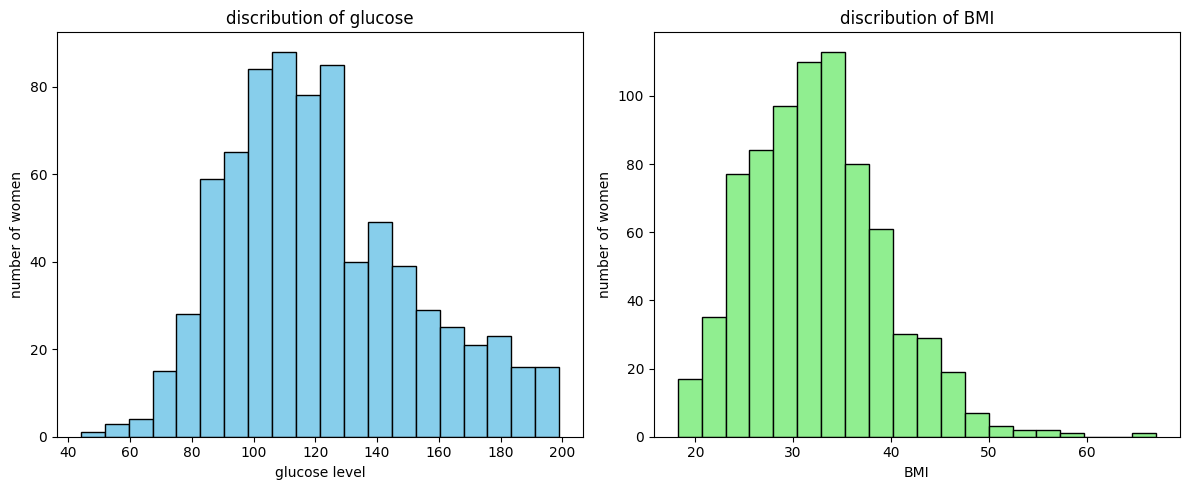

In [134]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(data["Glucose"], bins=20, color="skyblue", edgecolor="black")
plt.title("discribution of glucose")
plt.xlabel("glucose level")
plt.ylabel("number of women")
plt.subplot(1,2,2)
plt.hist(data["BMI"],bins=20,color="lightgreen",edgecolor="black")
plt.title("discribution of BMI")
plt.xlabel("BMI")
plt.ylabel("number of women")
plt.tight_layout()
plt.show()



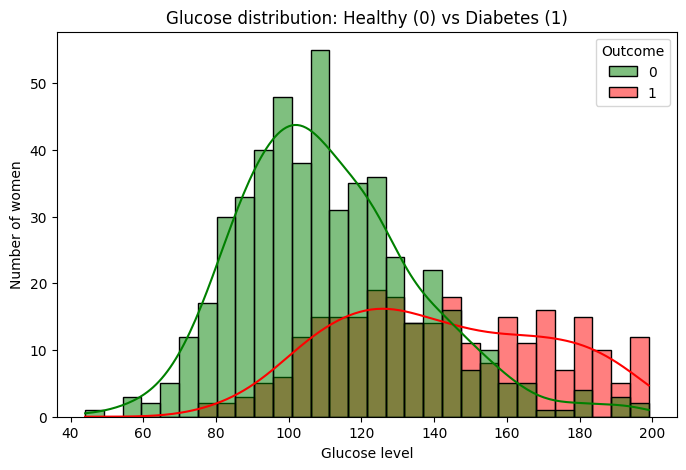

In [135]:

plt.figure(figsize=(8,5))
sns.histplot(data=data, x="Glucose", hue="Outcome", bins=30, kde=True, palette={0:"green",1:"red"})
plt.title("Glucose distribution: Healthy (0) vs Diabetes (1)")
plt.xlabel("Glucose level")
plt.ylabel("Number of women")
plt.show()


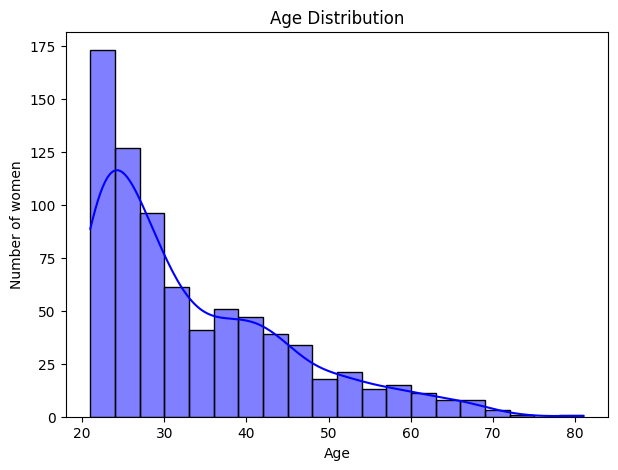

In [136]:
plt.figure(figsize=(7,5))
sns.histplot(data["Age"], bins=20, kde=True, color="blue")  # היסטוגרמה של גיל
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of women")
plt.show()



/tmp/ipython-input-2722485998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


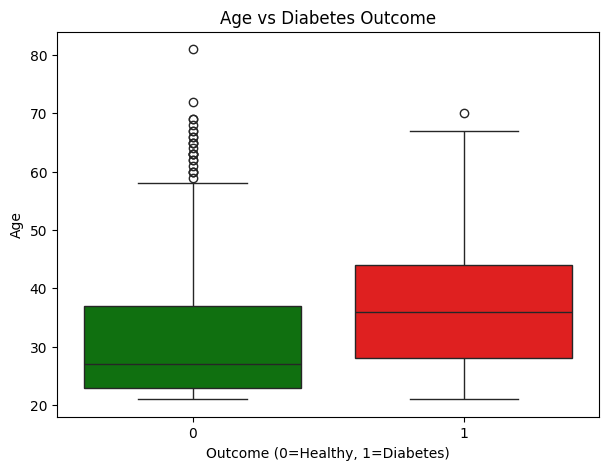

In [137]:
plt.figure(figsize=(7,5))

sns.boxplot(
    x="Outcome",
    y="Age",
    data=data,
    palette=["green","red"]  # ירוק=בריאות, אדום=סוכרת
)

plt.title("Age vs Diabetes Outcome")
plt.xlabel("Outcome (0=Healthy, 1=Diabetes)")
plt.ylabel("Age")
plt.show()



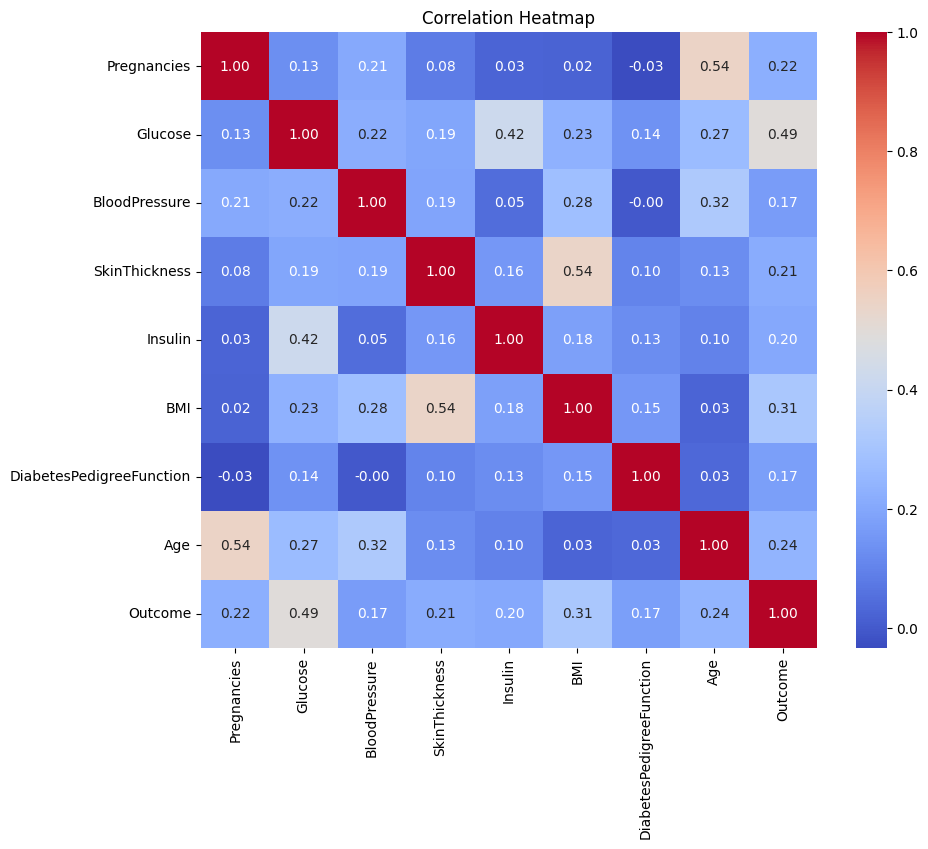

In [145]:
plt.figure(figsize=(10,8))
corr = data.corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True
)

plt.title("Correlation Heatmap")
plt.show()


## 5. Model Training
We split the dataset into **70% training** and **30% testing** sets (stratified by outcome).  
We train two models for comparison:  
- **Decision Tree Classifier**  
- **Support Vector Machine (SVM)**


In [146]:
from sklearn.model_selection import train_test_split

X = data.drop("Outcome", axis=1)
y = data["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y,

    test_size=0.3,

    random_state=42,

    stratify=y

)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (537, 8)
Test set size: (231, 8)


Accuracy: 0.6926406926406926


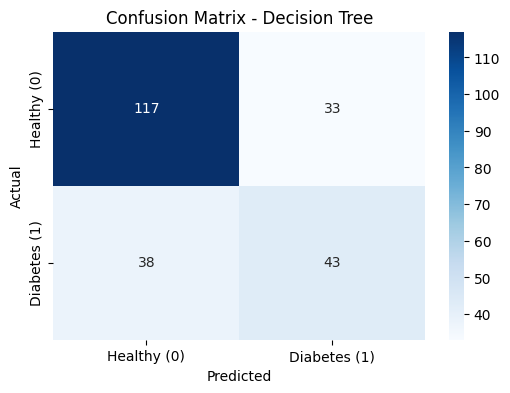


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       150
           1       0.57      0.53      0.55        81

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy (0)", "Diabetes (1)"], yticklabels=["Healthy (0)", "Diabetes (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


SVM Accuracy: 0.7229437229437229


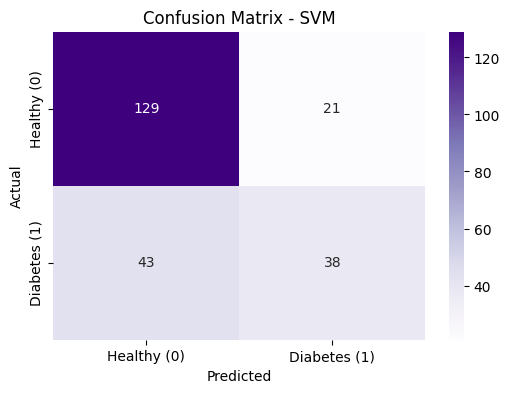


Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       150
           1       0.64      0.47      0.54        81

    accuracy                           0.72       231
   macro avg       0.70      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231



In [148]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

svm_model = SVC(kernel="linear", random_state=42)  # מודל SVM עם גרעין ליניארי


svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Healthy (0)", "Diabetes (1)"],
            yticklabels=["Healthy (0)", "Diabetes (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

print("\nClassification Report - SVM:")
print(classification_report(y_test, y_pred_svm))


In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Decision Tree ---
dt_acc = accuracy_score(y_test, y_pred)
dt_prec = precision_score(y_test, y_pred)
dt_rec = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

# --- SVM ---
svm_acc = accuracy_score(y_test, y_pred_svm)
svm_prec = precision_score(y_test, y_pred_svm)
svm_rec = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# --- טבלה להשוואה ---
results = pd.DataFrame({
    "Model": ["Decision Tree", "SVM"],
    "Accuracy": [dt_acc, svm_acc],
    "Precision": [dt_prec, svm_prec],
    "Recall": [dt_rec, svm_rec],
    "F1-Score": [dt_f1, svm_f1]
})

print(results)


           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.692641   0.565789  0.530864  0.547771
1            SVM  0.722944   0.644068  0.469136  0.542857


In [143]:
#### Model Comparison
#The Decision Tree achieved higher recall (0.53), meaning it was better at identifying true diabetic patients,
#while the SVM achieved higher accuracy (0.72) and precision (0.64), meaning it was more reliable when predicting diabetes.
#Overall, both models show similar F1-scores, but the choice depends on whether recall (medical context) or precision (minimizing false alarms) is prioritized.


Accuracy: 0.7229437229437229
Precision: 0.6440677966101694
Recall: 0.4691358024691358
F1-Score: 0.5428571428571428


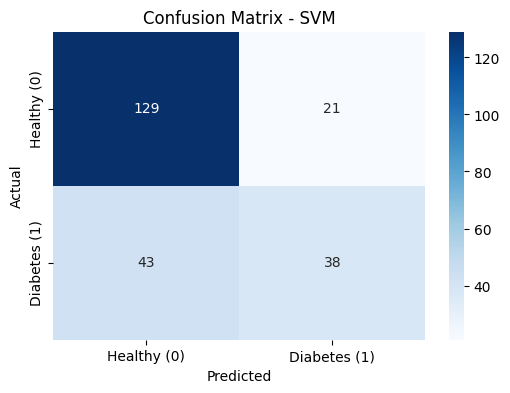

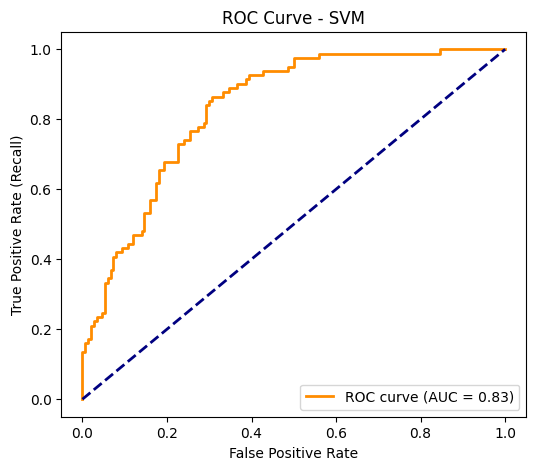

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# --- חישוב מדדים (על מודל SVM לדוגמה, אפשר גם על Decision Tree) ---
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Healthy (0)", "Diabetes (1)"],
            yticklabels=["Healthy (0)", "Diabetes (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# --- ROC Curve ---
y_proba = svm_model.decision_function(X_test)   # מקבלים ציון הסתברותי מכל דגימה
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")  # קו רנדומלי להשוואה
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.show()


## 6. Evaluation and Conclusion
We evaluate models using Accuracy, Precision, Recall, F1-score, Confusion Matrix, and ROC Curve.  

- **Decision Tree**: better recall (~0.53) → identifies more true diabetic patients.  
- **SVM**: higher accuracy (~ 0.72) and precision (~ 0.64) → more reliable when predicting diabetes.  

Both models show similar F1-scores (~0.55).  
**Conclusion:** Choice of model depends on the goal: prioritize recall for medical use, or precision for minimizing false alarms.
